# Part I - (Ford Go Bike Dataset Exploration)
## by Kevin Chiwakaya


# Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#uni">Univariate Exploration</a></li>
<li><a href="#biv">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
<li><a href="#concl">Conclusion</a></li> 

</ul>




<a id='intro'></a>
## Introduction
> The Ford Go Bike Dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


<a id='wrangling'></a>
## Preliminary Wrangling


In [47]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [48]:
ford_df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [49]:
ford_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [50]:
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

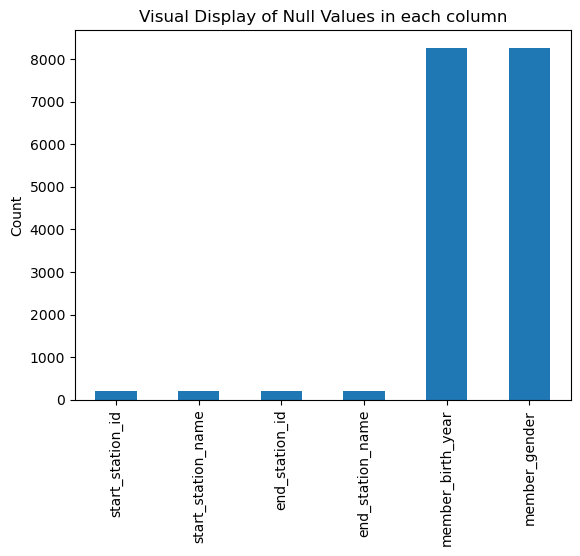

In [51]:
ford_df.isna().sum()[ford_df.isna().sum()>0].plot(kind='bar')
plt.title('Visual Display of Null Values in each column')
plt.ylabel('Count')
plt.show()

In [52]:
ford_df.dropna(inplace=True)
ford_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### What is the structure of your dataset?

> My dataset has 174952 rows and 16 columns

### What is/are the main feature(s) of interest in your dataset?

> Factors that influence bike sharing such as user type, duration of rides and distance travelled

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>Bike sharing, duration of trips, Gender, age and user type

<a id='uni'></a>
## Univariate Exploration


### What is the frequency of each user type?

In [53]:

#function to enable a countplot on different variables
def myplot(data,x,title,xlabel,ylabel):
    ax = sb.countplot(data=ford_df, x=x,color=sb.color_palette()[0])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    total = float(len(ford_df))
    for i in ax.patches:
        percentage = '{:.3f}%'.format(100 * i.get_height()/total)
        x =i.get_x()+i.get_width()
        y = i.get_height()
        ax.annotate(percentage,(x,y),ha='right')
    
    plt.show()

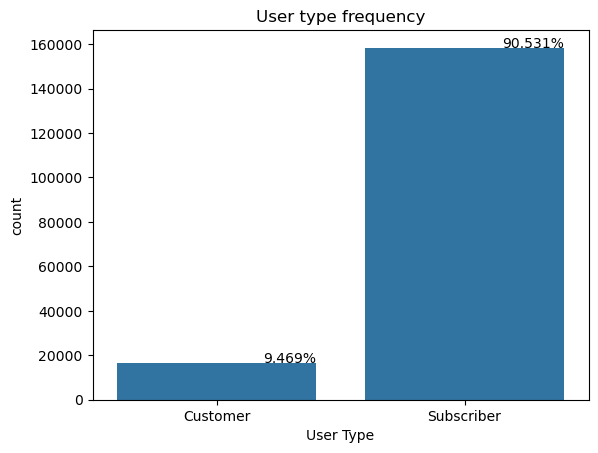

In [54]:
#calling my caller function to 
myplot(ford_df,'user_type','User type frequency','User Type','count')


#### The above plot shows that subcribers are more common than customers

### What is the frequency of each gender and which gender has the highest frequency?

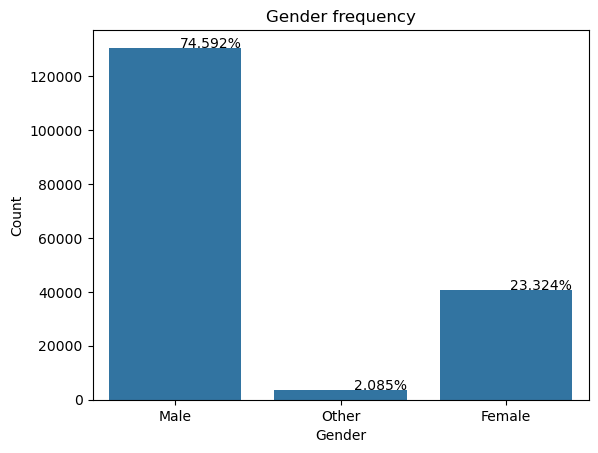

In [55]:
myplot(ford_df,'member_gender','Gender frequency','Gender','Count')


#### The above plot indicates that the males participate more than females and other gender

### What is the frequency of bike sharing


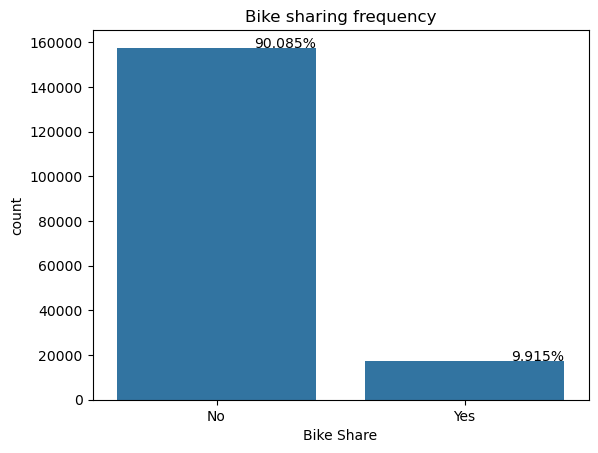

In [56]:
myplot(ford_df,'bike_share_for_all_trip','Bike sharing frequency','Bike Share','count')



#### The above plot indicates that there is less bike sharing

### What are the general birth years of bike riders?

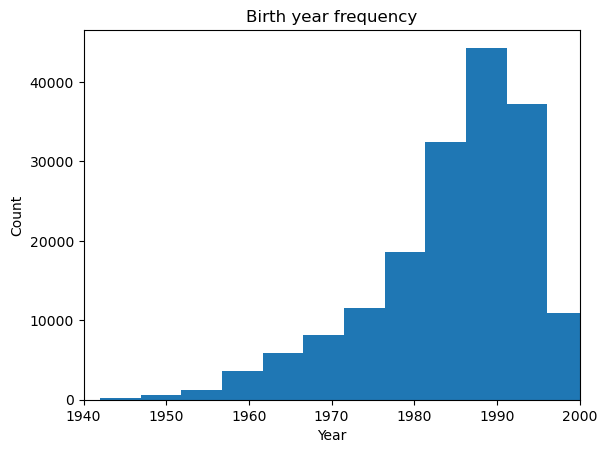

In [57]:


plt.hist(data=ford_df, x='member_birth_year',bins =25)
plt.title('Birth year frequency')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xlim(1940,2000)

plt.show()

#### Most bike riders were born between 1980 and 2000

#### Calculating age of bike riders

In [58]:
today = datetime.date.today()
ford_df['Age']= today.year - ford_df['member_birth_year']

### What is the age frequency of bike riders?

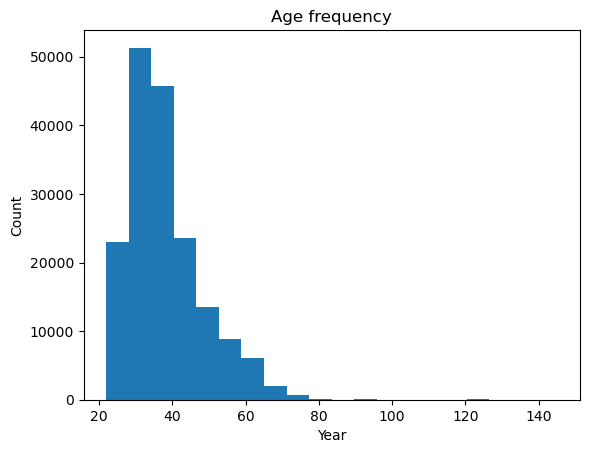

In [59]:

plt.hist(data=ford_df, x='Age',bins =20)
plt.title('Age frequency')
plt.xlabel('Year')
plt.ylabel('Count')
#plt.xlim(1940,2000)

plt.show()

#### The histogram is right skewed suggesting that most bike riders are young people however it also shows some impractical ages for bike riders for example 120 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

<ul>
    <li>The data showed that there were more subscribers than customers</li>
    <li>The were more male riders than female and other gender</li>
    <li>Non bike sharing was more prevalent than bike sharing</li>
    <li>There were more young bike riders than older people</li>
</ul>

> Unusual points were there in the age variable in which there were ages above 100 years as bike riders

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> I just removed null values in the plot so as to work with a complete data set
> Only outliers like age of 140 I decided to use plots eliminate them from the visualisation if they are affecting the true picture of the data

<a id='biv'></a>
## Bivariate Exploration

### Calculating distance covered using longitude and latitude of start and end positions of bikers

In [60]:
#setting base color for upcoming plots
base_color = sb.color_palette()[0]

In [61]:

def caldistance(start_lat, start_lon, end_lat, end_lon):
    #convert latitudes and longitudes to radius and reassign
    start_lat, start_lon, end_lat, end_lon = np.radians([start_lat, start_lon, end_lat, end_lon])

    a = np.sin((end_lat-start_lat)/2.0)**2 + np.cos(start_lat) * np.cos( end_lat) * np.sin((end_lon-start_lon)/2.0)**2

    earth_radius_est=6371 #earth's estimated radius
    return earth_radius_est * 2 * np.arcsin(np.sqrt(a))# return caluculated distance

#call function and calculate distance and put it into new column
ford_df['dist'] =  caldistance(ford_df.start_station_latitude, ford_df.start_station_longitude,
                 ford_df.end_station_latitude, ford_df.end_station_longitude)

In [62]:
#check status of the new column
ford_df.dist.describe()


count    174952.000000
mean          1.690049
std           1.096957
min           0.000000
25%           0.910443
50%           1.429829
75%           2.224010
max          69.469241
Name: dist, dtype: float64

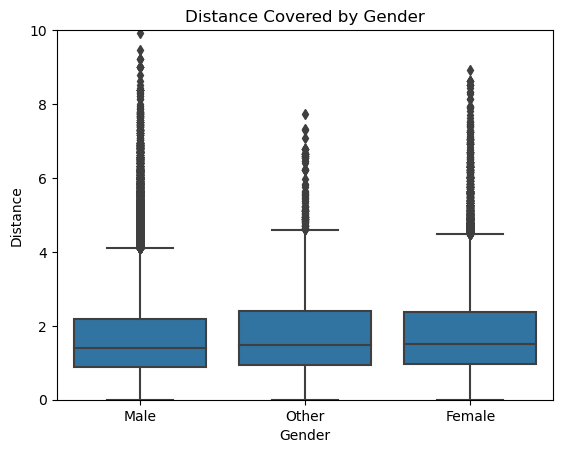

In [63]:
def multivaraite(data,x,y,title,xlabel,ylabel):
    sb.boxplot(data=data, y=y, x=x, color=base_color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,10)

    
multivaraite(ford_df,'member_gender','dist','Distance Covered by Gender', 'Gender','Distance')


#### The above plot shows that there are no signgicant differences in terms of distance covered by the various genders with their minimum and average distances being the same.


### What is the relationship between user type and distance covered?

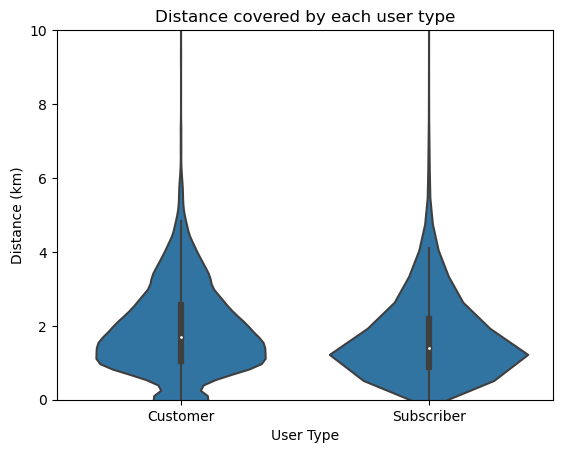

In [64]:
sb.violinplot(data=ford_df, x='user_type', y='dist', color=base_color)
plt.title('Distance covered by each user type')
plt.xlabel('User Type')
plt.ylabel('Distance (km)')
plt.ylim(0,10)
plt.show()

#### The above plot indicates that customers covered more distance than subcribers

### What is the relationship between user type and duration of bike trips

#### Convert duration seconds to minutes for easier understanding

In [65]:
ford_df['duration_min'] = ford_df.duration_sec/60

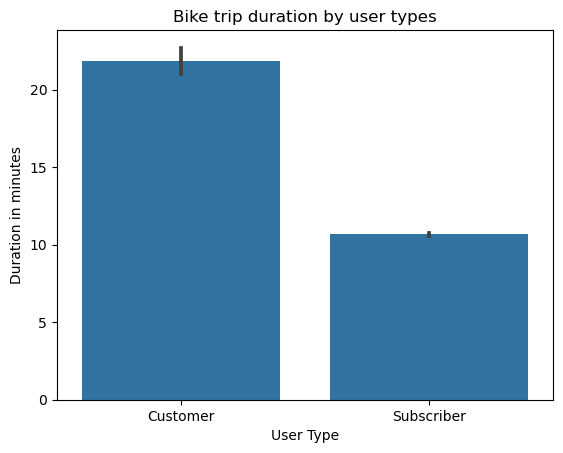

In [66]:
sb.barplot(data=ford_df, x='user_type', y='duration_min', color=base_color)
plt.title('Bike trip duration by user types')
plt.xlabel('User Type')
plt.ylabel('Duration in minutes')
plt.show()

#### The above plot indicate that customers took more time on bike rides than subscribers

#### What is the relationship between gender and duration of bike rides

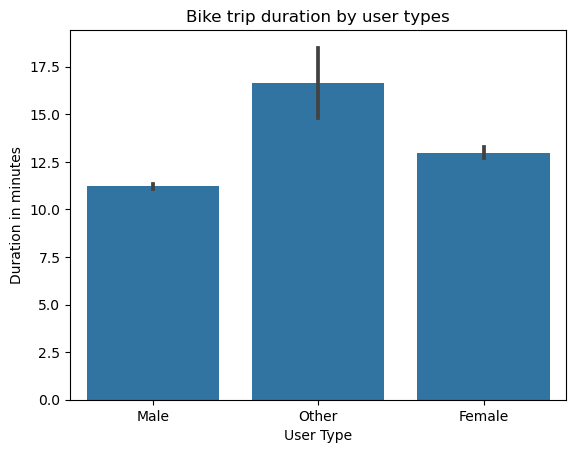

In [67]:
sb.barplot(data=ford_df, x='member_gender', y='duration_min', color=base_color)
plt.title('Bike trip duration by user types')
plt.xlabel('User Type')
plt.ylabel('Duration in minutes')
plt.show()

#### The above plot shows that males took less time on bike rides

### Is there a relationship between bike sharing  distance covered by bikers?

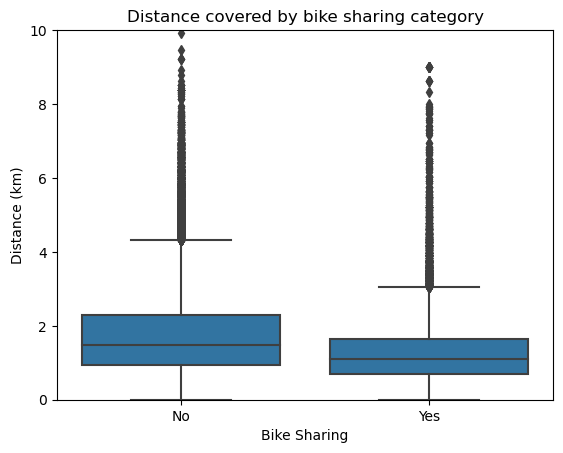

In [68]:
sb.boxplot(data=ford_df, x='bike_share_for_all_trip', y='dist', color=base_color)
plt.title('Distance covered by bike sharing category')
plt.xlabel('Bike Sharing')
plt.ylabel('Distance (km)')
plt.ylim(0,10)
plt.show()

#### The above plot shows bikers who shared bicycles covered less distance

### What is the relationship between user type and age

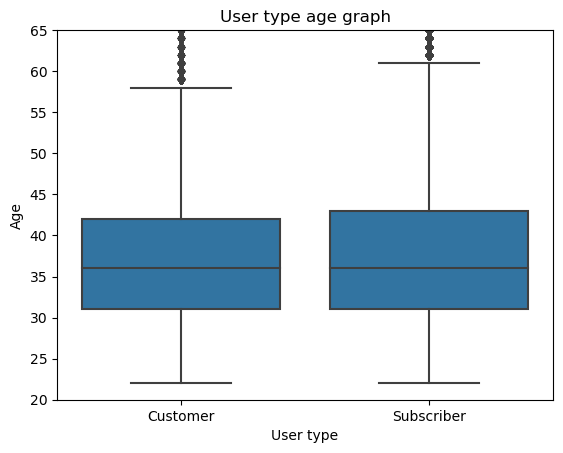

In [69]:
sb.boxplot(data=ford_df, x='user_type', y='Age', color=base_color)
plt.title('User type age graph')
plt.xlabel('User type')
plt.ylabel('Age')
plt.ylim(20,65)
plt.show()

#### There is no clear cut relationship between user type and age 

### What is the relationship between bike sharing and age

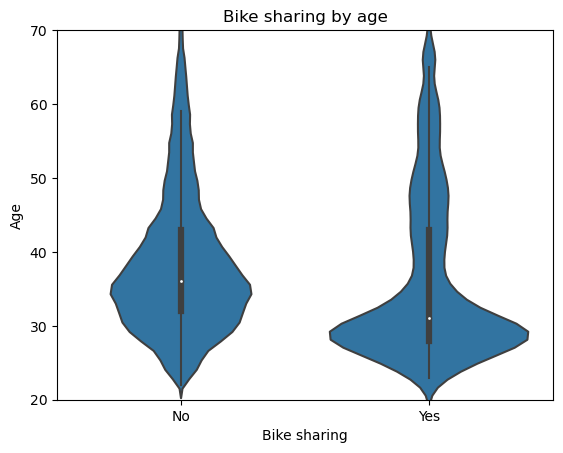

In [70]:
sb.violinplot(data=ford_df, x='bike_share_for_all_trip', y='Age', color=base_color)
plt.title('Bike sharing by age')
plt.xlabel('Bike sharing')
plt.ylabel('Age')
plt.ylim(20,70)
plt.show()

#### The graph shows that  younger people shared bikes more than middle aged and older people

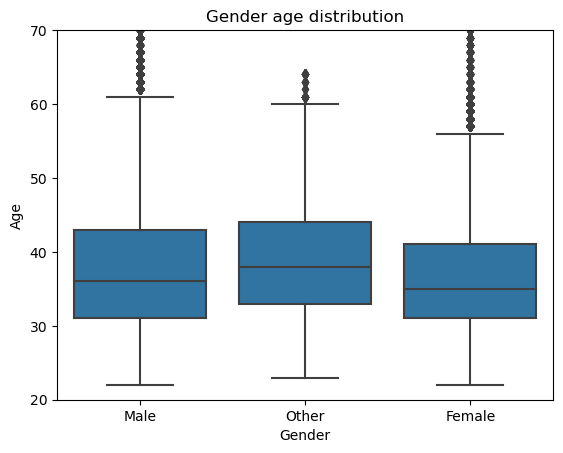

In [71]:

sb.boxplot(data=ford_df, x='member_gender', y='Age', color=base_color)
plt.title('Gender age distribution')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.ylim(20,70)
plt.show()

#### The graph shows that other gender had the oldest riders followed by males and females had the youngest

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>An interesting relationship in the dataset is one which showed that the distance covered by all genders was almost the same however the time taken to complete the distance is different with men being faster in covering the distance. Those that shared bikes covered less distance

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> All genders covered roughly the same distance suggesting that routes may have been pre-defined

<a id='multi'></a>
## Multivariate Exploration


### What is the relationship between gender, user type and duration of rides

In [72]:
def multivariatebar(data,x,y,hue,title,xlabel,ylabel):
    sb.barplot(data=data, x=x, y=y, hue=hue,palette='viridis_r')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

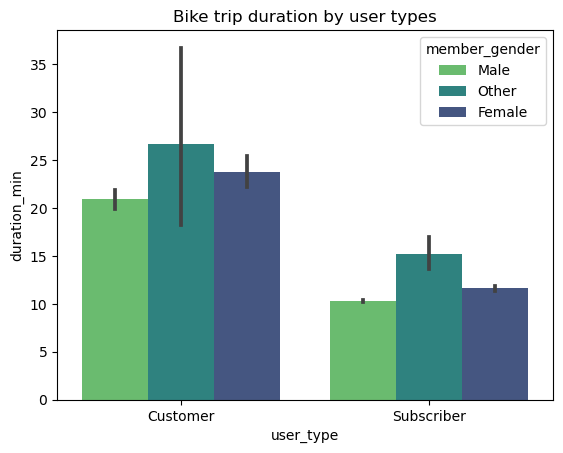

In [73]:
multivariatebar(ford_df,'user_type','duration_min','member_gender','Bike trip duration by user types','User Type','duration in hours')

#### The above plot show that in both customers and subscribers males took less time on bike rides

### What is the relationship between user type, duration of rides and bike sharing

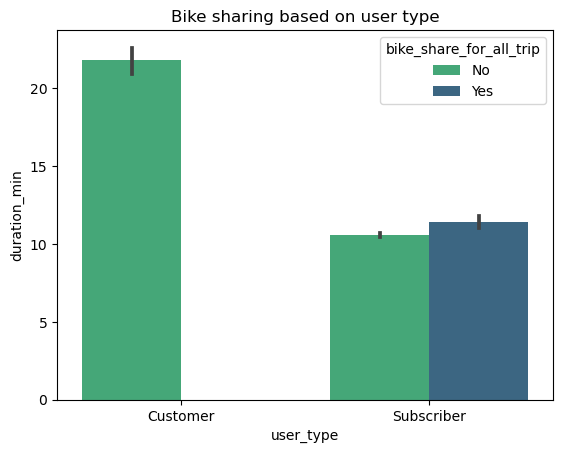

In [74]:
multivariatebar(ford_df,'user_type','duration_min','bike_share_for_all_trip','Bike sharing based on user type','duration hours','type')

#### The above plot show that there was no bike sharing among customers and they took longer on bike rides compared to subscribers

#### What is the relationship between gender, distance covered, and bike sharing

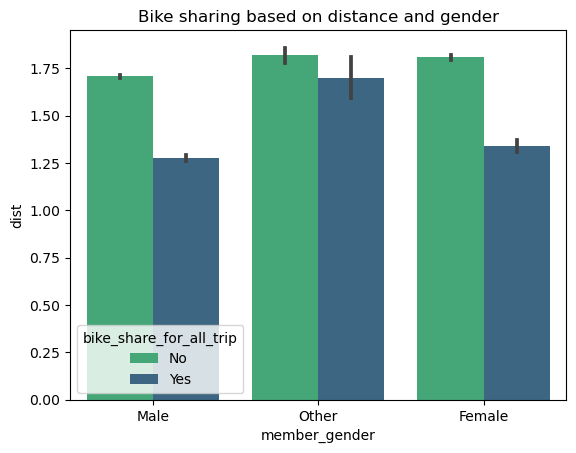

In [75]:
multivariatebar(ford_df,'member_gender','dist','bike_share_for_all_trip','Bike sharing based on distance and gender','duration hours','type')

#### The above plot indicate that Other gender covered more distance and had more bike sharing compared to males and females

In [76]:
#g= sb.FacetGrid(data =ford_df,hue='member_gender',aspect=1.5,palette='viridis_r')

#g =g.map(sb.histplot,'dist','duration_min')
#g.add_legend()
#plt.show()


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Customers spending more time on rides than subscribers was enforced after customers were further separated by gender
> The fact that bike sharing was associated with reduced distance covered was further reinforced

### Were there any interesting or surprising interactions between features?

> It was suprising that Other gender had the highest frequency of bike sharing and non sharing

<a id='concl'></a>
## Conclusions
<ul>
<li>There were more male bike riders than female and other gender</li>
<li>There were more subscribers than customers</li>
<li>Customers did not partipate in bike sharing</li>
<li>Non bike sharing was more frequent than bike sharing</li>
<li>males spent less time on bike rides than other genders</li>
</ul>
